# Ventas de Videojuegos

# Introducción  

La venta de videojuegos ha sido una industria en constante evolución que ha experimentado un crecimiento sorprendente hasta el año 2016. Este sector ha sido objeto de numerosos estudios e investigaciones que han arrojado luz sobre sus tendencias y factores determinantes.  
La industria de los videojuegos ha experimentado un crecimiento sostenido en términos de ingresos y popularidad a lo largo de las décadas, convirtiéndose en una forma de entretenimiento global de gran relevancia económica y cultural. Desde los primeros días de los videojuegos arcade en la década de 1970 hasta la explosión de las consolas de videojuegos y los juegos en línea en los años 2000, la industria ha evolucionado de manera significativa.  

Realizar un análisis de los datos de las ventas de los videojuegos es importantes porque permite identificar patrones y tendencias en la popularidad de ciertos géneros, la influencia de las reseñas de usuarios y profesionales, la evolución de las plataformas de juego y la duración del tiempo de vida de las consolas, entre otros. Estos conocimientos son esenciales para anticipar y adaptarse a las demandas cambiantes del mercado.

# Contenido

* [Objetivos](#objetivos)
* [Etapas](#etapas)
* [Diccionario de Datos](#diccionario)
* [Inicialización](#inicio)
* [1 Preparar los datos](#preparar_datos)
* [2 Análisis de los datos](#analisis_datos)
    * [2.1 Videojuegos lanzados por año ](#vdg_year)
    * [2.2 Ventas por plataforma](#platform)
    * [2.3 Plataformas líderes en ventas](#lideres_ventas)
    * [2.4 Reseñas de usuarios y profesionales y las ventas](#scores)
    * [2.5 Ventas por regiones](#regiones)
        * [2.5.1 Ventas por plataformas](#plataformas_regiones)
        * [2.5.2 Ventas por Géneros](#generos_region)
        * [2.5.3 Ventas por Clasificación](#rating_region)
* [3 Pruebas de Hipótesis](#hipotesis)
* [4 Resumen y Conclusión General](#end)

# Objetivos <a id='objetivos'></a>  

* Obtener una comprensión general de los datos
* Identificar tendencias y patrones importantes
* Preparar los datos para un análisis más detallado
* Determinar cuántos juegos fueron lanzados en diferentes años
* Determinar cómo varían las ventas de una plataforma a otra
* Identificar el impacto de las reseñas en las ventas
* Determinar las preferencias de los jugadores en diferentes regiones
* Determinar si hay una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC
* Determinar si hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes



# Etapas <a id='etapas'></a>  

Se tiene un dataset con la información necesaria sobre las ventas de videojuegos, no hay información previa sobre la calidad de los datos, por lo tanto se revisará antes de comenzar a analizar los datos. 

Pasos a realizar:
1. Importar las librerías necesarias
2. Descripción de los datos, leer y guardar el Dataset con Pandas.
3. Procesamiento de los datos, preparar los datos para que sean analizados.
4. Análisis de datos, formulación de hipótesis y creación de gráficos.

# Diccionario de Datos <a id='diccionario'></a>  

— Name (Nombre)  
— Platform (Plataforma)  
— Year_of_Release (Año de lanzamiento)  
— Genre (Género)
— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)  
— EU_sales (ventas en Europa en millones de dólares estadounidenses)  
— JP_sales (ventas en Japón en millones de dólares estadounidenses)  
— Other_sales (ventas en otros países en millones de dólares estadounidenses)  
— Critic_Score (máximo de 100)  
— User_Score (máximo de 10)  
— Clasificación (ESRB)  

# Inicialización <a id='inicio'></a>

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
# Carga del archivo de datos
df_games = pd.read_csv('files/datasets/games.csv')

## Preparar los Datos <a id='preparar_datos'></a>

In [3]:
# información general/resumida sobre el DataFrame de los videojuegos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<span style="color:darkgreen">
El Dataframe tiene un total de 11 columnas con 16715 filas solamente, hay datos ausentes en algunas columnas. Se tienen tipos de datos objeto y flotante.
</span>

In [4]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<span style="color:darkgreen">
Los nombres de las columnas tienen letras en mayúscula, por tanto se cambiarán a minúscula.
</span>

In [5]:
# se guardan los nombres de las columnas en una lista
name_columns = df_games.columns
name_columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#se define una nueva lista vacia para guardar los nuevos nombre de las columnas en minúscula
lower_name_columns = []
# se crea un bucle for para cambiar dar formato en minúscula a los nombres
for name in name_columns:
    lower_name = name.lower()
    lower_name_columns.append(lower_name)
    
print(lower_name_columns)
    

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [7]:
# Se asignan los nuevos nombres de columna
df_games.columns = lower_name_columns

<span style="color:darkgreen">
    
Se cambia el tipo de dato de la columna `user_score` a flotante.
</span>

In [8]:
# cambio de tipo de datos de la columna 'user_score'
# errors='coerce' para que los valores inválidos se reemplazan por NaN.
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce') 

In [9]:
# se comprueban los tipos de datos
df_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Observación:**  
Sólo se cambió el tipo de dato de la columna `user_score`, ya que su tipo de dato era de tipo objeto y debido a que son puntuaciones/calificaciones de los usuarios se puede requerir hacer alguna operación matemática con esos datos. Al usar el parámetro errors='coerce' los valores inválidos se reemplazan por NaN al cambiar el tipo de dato, por lo tanto, la abreviatura **'TBD'** ("to be determined") que había en esa columna se sustituyó con valores nulos (`NaN`) y se dejarán así, ya que la puntuación aún no esta definida o asignada.

</span>

</div>

In [10]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
# ahora se cálculan los valores ausentes
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
# se calcula el porcentaje de datos nulos
porcentaje_nulos = (df_games.isna().sum().sum() / df_games.size) * 100
print(f'Porcentaje de datos nulos: {round(porcentaje_nulos, 1)} %')

Porcentaje de datos nulos: 13.5 %


<div style="background-color: lightyellow; padding: 10px;">
    
<span style="color: darkblue;">

**Observación:**

Los datos nulos de las columnas `name`, `year_of_release` y `genre` se eliminarán y respecto a las columnas `critic_score` y `critic_score` los valores nulos se susituirán con el valor de la mediana de cada género. Para lograr lo anterior se agruparan los datos por género y se calcula el valor de la mediana de las calificaciones de los críticos y los usuarios con el método median().  
Se elige la mediana ya que si hay valores atípicos es menos susceptible a variaciones que la media. Para la columna `rating` los datos nulos se sustiturán con `'Unknown'`.

</span>

</div>

In [13]:
# se eliminan los datos nulos de las columnas 'name', 'year_of_release' y 'genre'
# se emplea subset= para que elimine filas con valores nulos solo en esas columnas
df_games = df_games.dropna(subset=['name', 'year_of_release', 'genre'])

In [14]:
# se agrupan los datos por género y se emplea el método median() para calcular la mediana de las calificaciones
genre_median = df_games.groupby('genre')[['critic_score', 'user_score']].median()
genre_median

,critic_score,user_score
genre,,
Action,68.0,7.4
Adventure,66.0,7.6
Fighting,72.0,7.6
Misc,69.0,7.1
Platform,69.5,7.7
Puzzle,70.0,7.5
Racing,69.0,7.4
Role-Playing,74.0,7.8
Shooter,73.0,7.4


<span style="color: darkgreen;">
    
Ahora que se tienen los valores de la mediana para cada género se reemplazan los valores nulos con su respectivo valor de la mediana.  
    
</span>

In [15]:
# se guardan los índices (los géneros) en 'genres' usando index
genres = genre_median.index
genres

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='genre')

In [16]:
# las calificaciones de la crítica se guardan en una lista usando el método tolist()
scores_median_critic = genre_median['critic_score'].tolist()
scores_median_critic

[68.0, 66.0, 72.0, 69.0, 69.5, 70.0, 69.0, 74.0, 73.0, 70.0, 75.0, 73.0]

In [17]:
# se crea un diccionario con con los géneros y su calificación de la crítica
# se usa la función zip() que combina las dos listas en pares de elementos
# dict() convierte esos pares en un diccionario
dict_scores_critic = dict(zip(genres, scores_median_critic))
dict_scores_critic

{'Action': 68.0,
 'Adventure': 66.0,
 'Fighting': 72.0,
 'Misc': 69.0,
 'Platform': 69.5,
 'Puzzle': 70.0,
 'Racing': 69.0,
 'Role-Playing': 74.0,
 'Shooter': 73.0,
 'Simulation': 70.0,
 'Sports': 75.0,
 'Strategy': 73.0}

In [18]:
# Se crea un bucle for para iterar sobre cada género y llenar los valores nulos en la columna 'critic_score'
for genero, score in dict_scores_critic.items():
    condicion_genero = df_games['genre'] == genero # se crea la condición de filtrado
    df_games.loc[condicion_genero, 'critic_score'] = df_games.loc[condicion_genero, 'critic_score'].fillna(score)

<span style="color: darkgreen;">
    
Se realizan los mismos pasos anteriores para reemplazar los valores nulos de las columna `user_score` con la mediana de cada género.  
* Se guardan las calificaciones de los usuarios en una lista  
* Se crea un diccionario con con los géneros y su calificación de los usuarios
* Se crea un bucle for para iterar sobre cada género y llenar los valores nulos en la columna 'user_score'
    
</span>


In [19]:
# las calificaciones de los usuarios se guardan en una lista usando el método tolist()
scores_median_users = genre_median['user_score'].tolist()
scores_median_users

[7.4, 7.6, 7.6, 7.1, 7.7, 7.5, 7.4, 7.8, 7.4, 7.5, 7.4, 7.8]

In [20]:
# se crea un diccionario con con los géneros y su calificación de los usuarios
# se usa la función zip() y dict() para convertir los pares de valores en un diccionario
dict_scores_users = dict(zip(genres, scores_median_users))
dict_scores_users

{'Action': 7.4,
 'Adventure': 7.6,
 'Fighting': 7.6,
 'Misc': 7.1,
 'Platform': 7.7,
 'Puzzle': 7.5,
 'Racing': 7.4,
 'Role-Playing': 7.8,
 'Shooter': 7.4,
 'Simulation': 7.5,
 'Sports': 7.4,
 'Strategy': 7.8}

In [21]:
# Se crea un bucle for para iterar sobre cada género y llenar los valores nulos en la columna 'user_score'
for genero, score in dict_scores_users.items():
    condicion_genero = df_games['genre'] == genero # se crea la condición de filtrado
    df_games.loc[condicion_genero, 'user_score'] = df_games.loc[condicion_genero, 'user_score'].fillna(score)

In [22]:
# se sustituyen los valores nulos de la columna 'rating' con 'Unknown'
df_games['rating'].fillna('Unknown', inplace= True)

In [23]:
# para homogeneizar las calificaciones, la columna 'user_score' se multiplica por 10
df_games['user_score'] = df_games['user_score'] * 10

In [24]:
# se comprueban los valores nulos nuevamente
df_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<span style="color:darkgreen">
    
Ahora que la columna `year_of_release` no tiene valores nulos se cambia su tipo de dato a entero.
</span>

In [25]:
# cambio de tipo de dato de la columna 'year_of_release'
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')

In [26]:
# se verifican los tipos de datos nuevamente
df_games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Observación:**

En las columnas `name`, `year_of_release` y `genre`, la presencia de los datos nulos se puede deber a la falta de información para esas columnas ya que el resto de las columnas si tienen sus respetivos datos. Para las columnas `critic_score` y `critic_score` la presencia de los valores nulos quizas se deba a que los críticos y usuarios no jugaron el videojuego en cuestión y por ello no tienen un valor, para la columna `rating` tal vez la Junta de clasificación de software de entretenimiento aún no ha evaluado esos videojuegos para asignarles una clasificación.

</span>

</div>

<span style="color:darkgreen">
Se crea una función para calcular las ventas totales de videojuegos.
    
</span>

In [27]:
def total_ventas(df):
    '''Función que calcula el total de las ventas (la suma de las ventas en todas las regiones)
    '''
    na_sales = df['na_sales']
    eu_sales = df['eu_sales']
    jp_sales = df['jp_sales']
    other_sales = df['other_sales']
    
    total_sales = na_sales + eu_sales + jp_sales + other_sales
    
    return total_sales
    

In [28]:
# se emplea el método apply() con la función total_ventas() sobre el DataFrame 'df_games'
# apply() se usa con axis= 1 para que pase los valores de fila de la función
df_games['total_sales'] = df_games.apply(total_ventas, axis= 1)

In [29]:
# se imprime las primeras 5 filas del DataFrame con la nueva columna
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,77.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,78.0,Unknown,31.38


## Análisis de los datos <a id='analisis_datos'></a>

### Videojuegos lanzados por año <a id='vdg_year'></a>

In [30]:
# se agrupan por año los videojuegos
games_by_year = df_games.groupby('year_of_release')['year_of_release'].count()

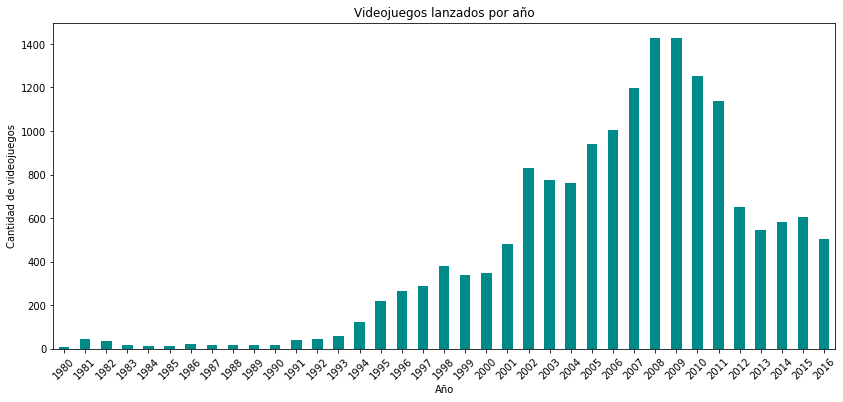

In [31]:
games_by_year.plot(kind= 'bar',
                  title= 'Videojuegos lanzados por año',
                  xlabel= 'Año',
                  ylabel='Cantidad de videojuegos',
                  rot= 45,
                  figsize= [14,6],
                  color= 'darkcyan'
                  )

plt.show()

<div style="background-color: lightyellow; padding: 10px;">
    
<span style="color: darkblue;">
   
**Observación:**

Los años en los que hay un mayor número de lanzamientos de videojuegos son del 2007 al 2011, siendo el 2008 y 2009 con la mayor cantidad, alrededor de 1400 videojuegos. A partir del gráfico se puede observar que el número de lanzamientos era mucho menor entre los años de 1980 y 1993, meno de 200 de videojuegos eran lanzados.

</span>

</div>

### Ventas por plataforma <a id='platform'></a>

In [32]:
# se agrupan los datos por plataforma con su total de ventas totales
total_sales_by_platform = df_games.groupby('platform')['total_sales'].sum()
# se ordenan los datos de menor a mayor
total_sales_by_platform.sort_values(inplace= True)
total_sales_by_platform

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

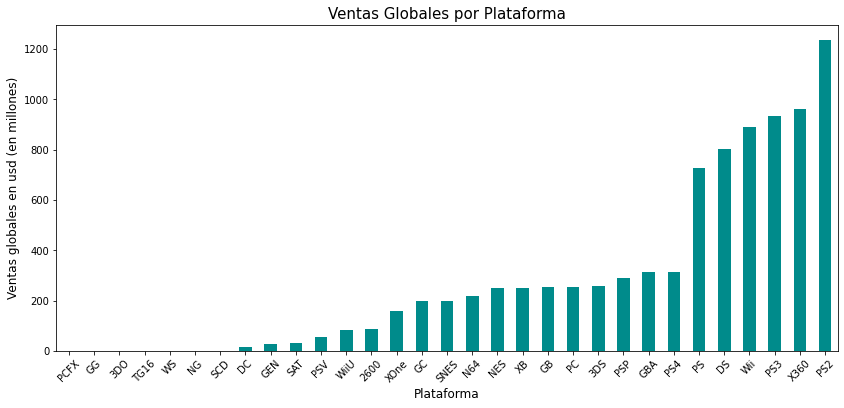

In [33]:
total_sales_by_platform.plot(kind= 'bar',
                  rot= 45,
                  figsize= [14,6],
                  color= 'darkcyan'
                  )

plt.title('Ventas Globales por Plataforma', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

<span style="color:darkgreen">
    
Las 5 plataformas con más ventas globales fueron **DS, Wii, PS3, X360 y PS2**.
    
</span>

In [34]:
# se crea una lista con el top de las 5 plataformas con más ventas globales
top_5_platforms = ['DS', 'Wii', 'PS3', 'X360', 'PS2']

In [35]:
# se filtra el DataFrame df_games con el método isin() solo con las 5 plataformas con más ventas globales
df_top_5_platforms = df_games[df_games['platform'].isin(top_5_platforms)] #[['platform', 'year_of_release', 'total_sales']]
df_top_5_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


In [36]:
# se crea una tabla dinámica para calcular el total de las ventas del top 5 de las plataformas
pivot_top_5_platforms = df_top_5_platforms.pivot_table(index='year_of_release',
                                                       columns='platform',
                                                       values='total_sales',
                                                       aggfunc='sum'
                                                      )


Text(111.5, 0.5, 'Año de lanzamiento')

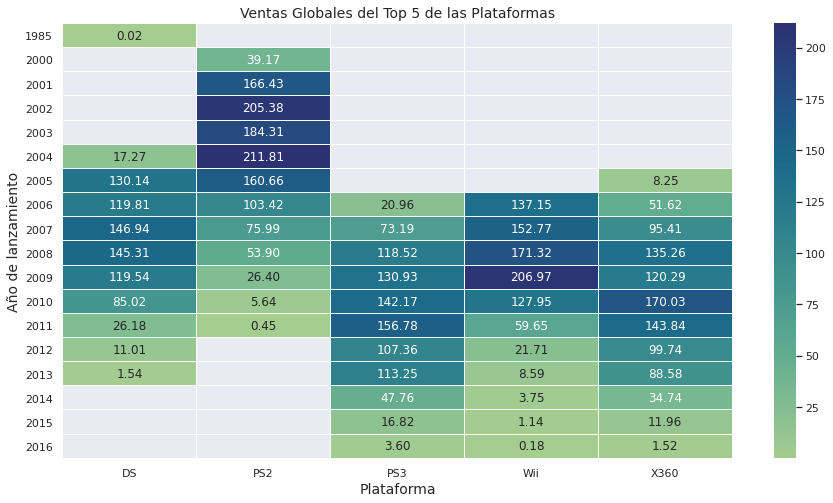

In [37]:
# A partir del DataFrame pivot_top_5_platforms se hace un heatmap con la librería seaborn

sns.set(rc={"figure.figsize": (15, 8)}) # se ajusta tamaño
# se grafica la tabla dinámica 'pivot_top_5_platforms'
sns.heatmap(pivot_top_5_platforms, annot=True, fmt=".2f", cmap="crest", linewidth=.01)

plt.title('Ventas Globales del Top 5 de las Plataformas', fontsize= 14)
plt.xlabel('Plataforma', fontsize= 14)
plt.ylabel('Año de lanzamiento', fontsize= 14)

<div style="background-color: lightyellow; padding: 10px;">
    
<span style="color: darkred;">

**Observación para plataforma DS:**

En el DataFrame `pivot_top_5_platforms` se observa que la plataforma **DS** tiene ventas para el año 1985, sin embargo, esa plataforma se lanzó en el año 2004. Por tanto, se buscarán los videojuegos en cuestión de ese año con un filtro.

</span>
</div>

In [38]:
# se aplica el filtro
df_top_5_platforms[df_top_5_platforms['year_of_release'] == 1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,68.0,74.0,Unknown,0.02


<div style="background-color: lightyellow; padding: 10px;">
    
<span style="color: darkred;">

**Observación para plataforma DS:**  
Se tiene un sólo videojuego registrado para ese año `Strongest Tokyo University Shogi DS`, el cuál fue lanzado en el 2007. Por lo tanto, se cambiará el año de 1985 por 2007. Lo anterior se hace para el DataFrame con todos los datos `df_games` y luego se vuelve a construir la tabla dinámica y se asigna nuevamente a `pivot_top_5_platforms`.
</span>
</div>

In [39]:
# se filtra el DataFrame df_games en donde el año de lanzamiento sea igual a 1985 y la plataforma sea DS
df_games[(df_games['year_of_release'] == 1985) & (df_games['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,68.0,74.0,Unknown,0.02


In [40]:
# el índice es 15957 entonces se cambia el valor del año con el método loc
df_games.loc[15957, 'year_of_release'] = 2007

In [41]:
# se compruba que el valor de 1985 se haya sustituido por 2007
# se filtra df_games para el nombre del videojuego 'Strongest Tokyo University Shogi DS' y la plataforma DS
df_games[(df_games['name'] == 'Strongest Tokyo University Shogi DS') & (df_games['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,68.0,74.0,Unknown,0.02


<span style="color:darkgreen">
    
El año 1985 se sustituyó por 2007 correctamente.
    
</span>

In [42]:
df_top_5_platforms = df_games[df_games['platform'].isin(top_5_platforms)]
df_top_5_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


In [43]:
# se filtra nuevamente el DataFrame df_games para el top 5 de plataformas con más ventas globales
df_top_5_platforms = df_games[df_games['platform'].isin(top_5_platforms)]

# se asigna nuevamente la tabla dinámica a pivot_top_5_platforms
pivot_top_5_platforms = df_top_5_platforms.pivot_table(index='year_of_release',
                                                       columns='platform',
                                                       values='total_sales',
                                                       aggfunc='sum'
                                                      )

Text(111.5, 0.5, 'Año de lanzamiento')

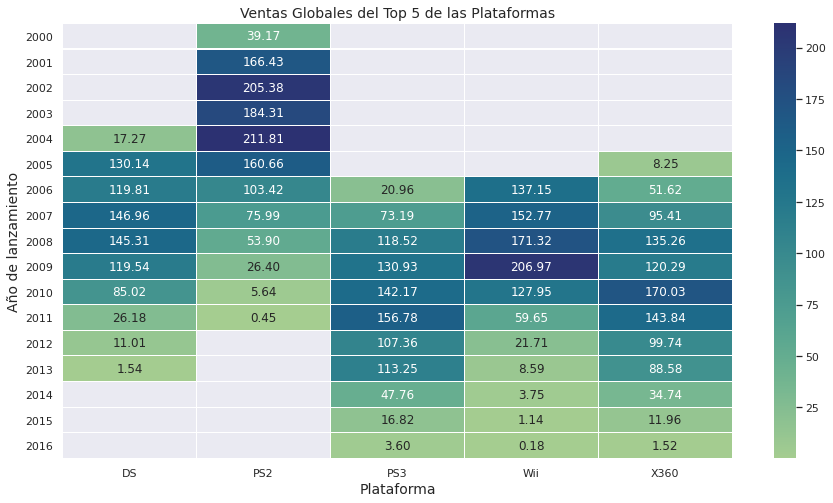

In [44]:
# hace un heatmap con la librería seaborn nuevamente
# se ajusta tamaño
sns.set(rc={"figure.figsize": (15, 8)})
# se grafica la tabla dinámica 'pivot_top_5_platforms'
sns.heatmap(pivot_top_5_platforms, annot=True, fmt=".2f", cmap="crest", linewidth=.01)

plt.title('Ventas Globales del Top 5 de las Plataformas', fontsize= 14)
plt.xlabel('Plataforma', fontsize= 14)
plt.ylabel('Año de lanzamiento', fontsize= 14)

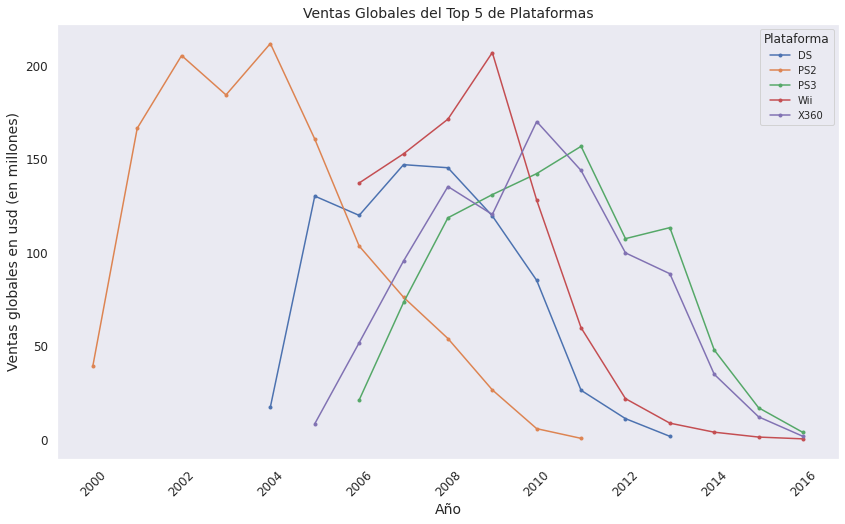

In [45]:
pivot_top_5_platforms.plot(
                       kind= 'line',
                       style='.-',
                       figsize= [14,8],
                       fontsize= 12,
                       rot= 45,
                       grid= False
                       )

plt.title('Ventas Globales del Top 5 de Plataformas', fontsize= 14)
plt.xlabel('Año', fontsize= 14)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 14)
plt.legend(title= 'Plataforma', fontsize= 10)

plt.show()

<span style="color:darkgreen">
    
La plataforma/consola con mayores ventas es PS2 desde el 2000 hasta el 2005. En el 2004 son lanzadas al mercado otras plataformas, por lo que la competencia crece y con ello las ventas de PS2 comienzan a disminuir.
    
</span>

<span style="color:darkgreen">
Ahora para saber el el tiempo de vida de las plataformas
</span>

In [46]:
# se crea una función para asignar una época a los juegos de acuerdo con el año de lanzamiento
def era(year):
    '''
    La función asigna una época a los videojuegos con base a su año de lanzamiento:
    —'retro'   para año < 2000
    —'modern'  para 2000 <= año < 2010
    —'recent'  para año >= 2010
    '''
    
    if year < 2000:
        return 'retro'
    elif year < 2010:
        return 'modern'
    else:
        return 'recent'

In [47]:
# se crea una columna para asignar la era
df_games['era'] = df_games['year_of_release'].apply(era)
# se imprimelas primeras 5 filas del DataFrame df_games
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,modern
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,77.0,Unknown,40.24,retro
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,modern
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77,modern
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,78.0,Unknown,31.38,retro


In [48]:
# se filtra el DataFrame con las plataformas retro
retro_platforms = df_games[df_games['era'] == 'retro']
retro_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,77.0,Unknown,40.24,retro
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,78.0,Unknown,31.38,retro
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,75.0,Unknown,30.26,retro
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,74.0,Unknown,28.31,retro
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,74.0,78.0,Unknown,23.09,retro


In [49]:
# se agrupa las ventas globales por plataforma
total_sales_retro = retro_platforms.groupby('platform')['total_sales'].sum()
total_sales_retro

platform
2600     86.48
3DO       0.10
DC        8.54
GB      225.43
GEN      28.35
GG        0.04
N64     180.71
NES     251.05
NG        1.44
PC       50.04
PCFX      0.03
PS      586.88
SAT      33.59
SCD       1.86
SNES    200.04
TG16      0.16
WS        0.46
Name: total_sales, dtype: float64

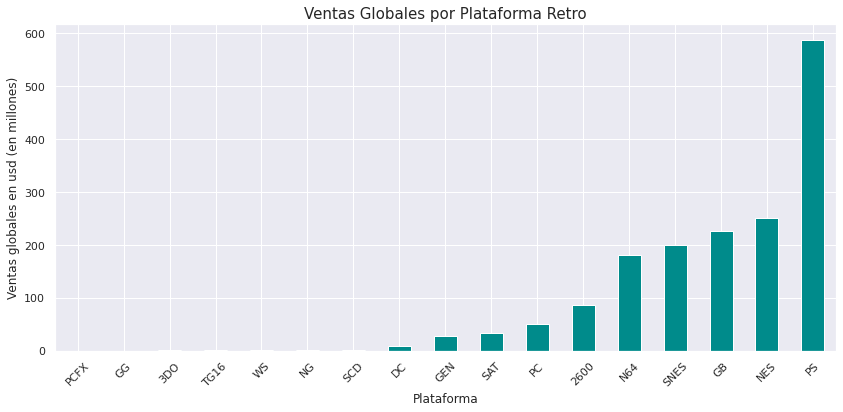

In [50]:
# se grafican las ventas globales para las plataformas retro
total_sales_retro.sort_values().plot(kind= 'bar',
       rot= 45,
       figsize= [14,6],
       color= 'darkcyan'
       )

plt.title('Ventas Globales por Plataforma Retro', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

<span style="color:darkgreen">
    
Las 10 plataformas retro (con lanzamiento menores al año 2000) con más ventas globales entre 1980 y 2000  fueron **DC, GEN, SAT, PC, 2600, N64, SNES, GB, NES y PS**.
    
Ahora se buscan las ventas globales de las plataformas retro populares en la época reciente para observar sus ventas.
    
</span>

In [51]:
# se crea una lista con las plataformas retro
retro_platforms_list = total_sales_retro.index
retro_platforms_list

Index(['2600', '3DO', 'DC', 'GB', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC',
       'PCFX', 'PS', 'SAT', 'SCD', 'SNES', 'TG16', 'WS'],
      dtype='object', name='platform')

In [52]:
# se filtra el DataFrame df_games con el método isin() solo con las 5 plataformas retro con más ventas
platforms_retro = df_games[df_games['platform'].isin(retro_platforms_list)]
platforms_retro.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,77.0,Unknown,40.24,retro
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,78.0,Unknown,31.38,retro
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,75.0,Unknown,30.26,retro
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,74.0,Unknown,28.31,retro
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,74.0,78.0,Unknown,23.09,retro


In [53]:
# se agrupan las ventas totales de las plataformas retro hasta la época actual
retro_total_sales_1985_2010 = platforms_retro.groupby('platform')['total_sales'].sum()
retro_total_sales_1985_2010

platform
2600     86.48
3DO       0.10
DC       15.95
GB      254.43
GEN      28.35
GG        0.04
N64     218.01
NES     251.05
NG        1.44
PC      255.76
PCFX      0.03
PS      727.58
SAT      33.59
SCD       1.86
SNES    200.04
TG16      0.16
WS        1.42
Name: total_sales, dtype: float64

In [54]:
# se concatena el Series total_sales_retro y retro_total_sales_1985_2010
concat_retro_platforms = pd.concat([total_sales_retro, retro_total_sales_1985_2010], axis='columns')
# se cambia el nombre de las columnas
concat_retro_platforms.columns = ['total_sales_before_2000', 'total_sales_after_2000']
concat_retro_platforms

,total_sales_before_2000,total_sales_after_2000
platform,,
2600,86.48,86.48
3DO,0.10,0.10
DC,8.54,15.95
GB,225.43,254.43
GEN,28.35,28.35
GG,0.04,0.04
N64,180.71,218.01
NES,251.05,251.05
NG,1.44,1.44


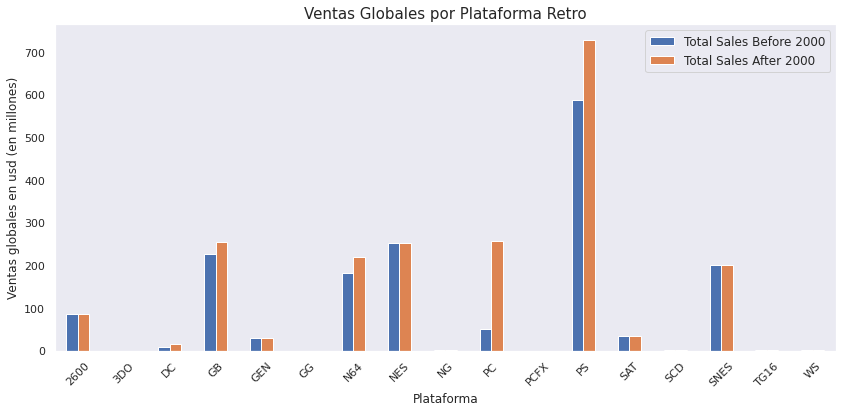

In [55]:
# se grafican las ventas globales para las plataformas retro
concat_retro_platforms.plot(kind= 'bar',
       rot= 45,
       figsize= [14,6],
       grid= False
       )

plt.title('Ventas Globales por Plataforma Retro', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.legend(['Total Sales Before 2000', 'Total Sales After 2000'], fontsize= 12)
plt.show()

<span style="color:darkgreen">
Ahora para saber el tiempo de vida de las plataformas, para cada una se calcula el mínimo y el máximo año de lanzamiento. Después se realiza una diferencia entre ambos valores y se grafican.
</span>

In [56]:
# se agrupan los datos por plataforma y se calcula el año mínimo y el máximo 
lifespan_platforms = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
# se renombran las columnas
lifespan_platforms.columns = ['year_release_min', 'year_release_max']
lifespan_platforms

,year_release_min,year_release_max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,2004,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


In [57]:

# se crea una columna 'lifespan' para calcular el tiempo de vida
lifespan_platforms['lifespan'] = lifespan_platforms['year_release_max'] - lifespan_platforms['year_release_min']
lifespan_platforms

,year_release_min,year_release_max,lifespan
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [58]:
# se ordenan los datos de menor a mayor con base a la columna 'year_release_min'
# así estarán ordenadas las plataformas de acuerdo al primer lanzamiento de un videojuego
lifespan_platforms.sort_values(by=['year_release_min'], inplace= True)
lifespan_platforms

,year_release_min,year_release_max,lifespan
platform,,,
2600,1980,1989,9
NES,1983,1994,11
PC,1985,2016,31
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0
SCD,1993,1994,1
NG,1993,1996,3


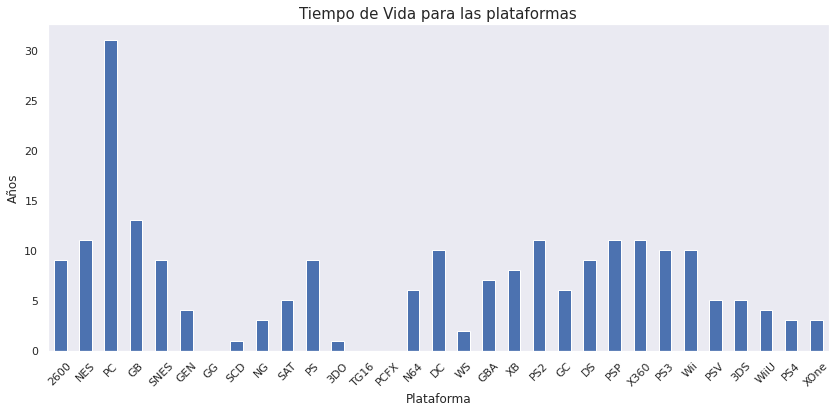

In [59]:
# se grafica el tiempo de vida de las plataformas
lifespan_platforms['lifespan'].plot(kind= 'bar',
       rot= 45,
       figsize= [14,6],
       grid= False
       )

plt.title('Tiempo de Vida para las plataformas', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Años', fontsize= 12)

plt.show()

In [60]:
# se calcula el tiempo de vida promedio para las plataformas 'retro'
print('El tiempo de vida promedio para las plataformas Retro es:')
lifespan_platforms[lifespan_platforms.index.isin(retro_platforms_list)]['lifespan'].mean()

El tiempo de vida promedio para las plataformas Retro es:


6.705882352941177

In [61]:
# se guardan en un array las plataformas de la era reciente, filtrando el DataFrame df_games
modern_recent_platforms_list = df_games[~(df_games['era'] == 'retro')]['platform'].unique()
modern_recent_platforms_list

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

In [62]:
# dado que para la plataforma PC su primer lanzamiento fue en 1985, esta se considerará en la era 'retro'
# por que se elimina de la lista de plataformas recientes
modern_recent_platforms_list = modern_recent_platforms_list[modern_recent_platforms_list != 'PC']
modern_recent_platforms_list

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

In [63]:
# se calcula el tiempo de vida promedio de las plataformas recientes
print('El tiempo de vida promedio para las plataformas Recientes es:')
lifespan_platforms[lifespan_platforms.index.isin(modern_recent_platforms_list)]['lifespan'].mean()

El tiempo de vida promedio para las plataformas Recientes es:


7.526315789473684

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Obervaciones:**  
Las 5 plataformas con más ventas globales son DS, Wii, PS3, X360 y PS2. Del año 2000 hasta 2004 la consola PS2 tenía mayores ventas, pero a partit del 2004 a parecen otras plataformas de nueva generción como el Nintendo DS. Lo anterior conlleva a que las ventas del PS2 diminuyan y las de las nuevas plataformas aumenten. El Nintendo Wii tuvo la mayor cantidad de ventas globales a partir de su lanzamiento en 2006 hasta el 2009. A partir del 2010 las cosolas que lideran las ventas globales son X360 y PS3.

Las 10 platformas retro (lanzadas antes del 2000) que solían ser populares eran DC, GEN, SAT, PC, 2600, N64, SNES, GB, NES y PS. Sim embargo, a partir del año 2000 sus ventas se mantienen o no umentan de manera considerable, por lo que ya no lideran las ventas globales, lo cuál se debe al lanzamiento de consolas de nueva generación. Es importante mencionar que la  única plataforma que se ha mantenido vigente y que sus aumentaron sus ventas fue para PC, sus ventas aumentaron aproximadamente en 411.11 %.

En promedio las plataformas retro su tiempo de vida es 6.7 años, considerando a la plataforma PC como retro. Mientras que, para plataformas lanzadas a partir del 2000 su tiempo de vida promedio es 7.5 años.

</span>

</div>

### Plataformas líderes en ventas <a id='lideres_ventas'></a>

<div style="background-color: lightyellow; padding: 10px;">
<span style="color: darkblue;">

Dado que el tiempo de vida de las plataformas esta entre 6 y 8 años y que sólo dos plataformas retro se mantienen vigentes, o bien, con ventas después del 2000, PC y PS. Además, las plataformas con más ventas globales después del 2010 son PS3 y X360, asimismo, la consola PS4 es de nueva generación por tanto lo más probable es que desplace al PS3. Con base a lo anterior, sólo se tomarán en cuenta los datos a partir del año 2014, para tomar en cuenta solo plataformas con ventas relevantes y de nueva genración.
    
</span>

</div>

In [64]:
# se filtra el DataFrame df_games para guardar los datos que pertencen al año 2010 en adelante
df_2014_2016 = df_games[df_games['year_of_release'] > 2013]
df_2014_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,74.0,Unknown,14.63,recent
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,recent
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,78.0,Unknown,11.68,recent
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58,recent
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,74.0,Unknown,7.98,recent


In [65]:
# se agrupan los datos por plataforma con la suma de sus ventas globales
platforms_2014_2016 = df_2014_2016.groupby('platform')['total_sales'].sum()
platforms_2014_2016.sort_values(inplace= True)
platforms_2014_2016

platform
PSP       0.36
Wii       5.07
PSV      22.40
PC       27.05
WiiU     42.98
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: total_sales, dtype: float64

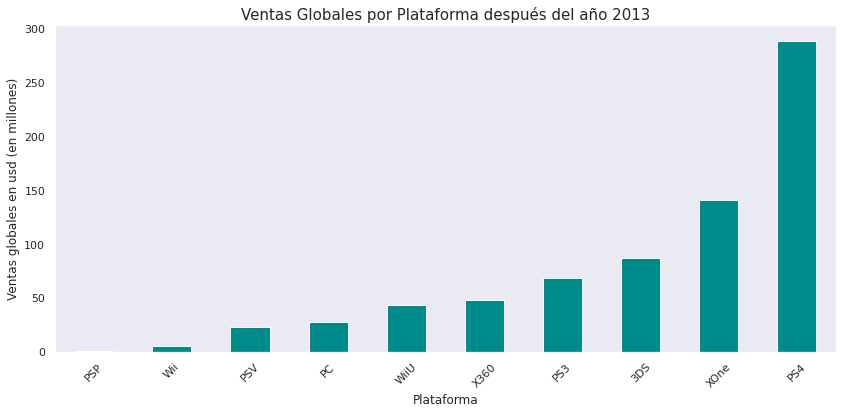

In [66]:
# se grafica el Series con las ventas por plataforma
platforms_2014_2016.plot(kind= 'bar',
                  rot= 45,
                  figsize= [14,6],
                  color= 'darkcyan',
                  grid= False
                  )

plt.title('Ventas Globales por Plataforma después del año 2013', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

<span style="color:darkgreen">  
    
Las 10 plataformas con más ventas a nivel global son: **PSP, Wii, PSV, PC, WiiU, X360, PS3, 3DS, XOne y PS4**.  
    
Ahora se revisan sus ventas para cada año a partir del 2013.
    
</span>


In [67]:
# se crea una lista con las 10 plataformas con más ventas
top_10_list = ['PSP', 'Wii', 'PSV', 'PC', 'WiiU', 'X360', 'PS3', '3DS', 'XOne', 'PS4']
# se filtra el DataFrame df_2000_2016 para el top 10 de plataformas con más ventas globales
df_top_10_platforms = df_2014_2016[df_2014_2016['platform'].isin(top_10_list)]
df_top_10_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,74.0,Unknown,14.63,recent
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,recent
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,78.0,Unknown,11.68,recent
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58,recent
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,74.0,Unknown,7.98,recent


In [68]:
# se crea un DataFrame con pivot_table() para las ventas totales para cada plataforma en cada año
# se asigna el resultado a pivot_top_10_platforms
pivot_2014_2016 = df_top_10_platforms.pivot_table(index='platform',
                                    columns='year_of_release',
                                    values='total_sales',
                                    aggfunc='sum'
                                    )

Text(48.5, 0.5, 'Plataforma')

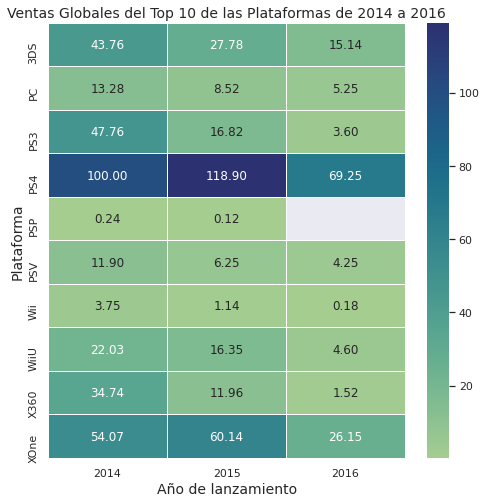

In [69]:
# hace un heatmap con la librería seaborn 
# se ajusta tamaño
sns.set(rc={"figure.figsize": (8, 8)})
# se grafica la tabla dinámica 'pivot_top_5_platforms'
sns.heatmap(pivot_2014_2016, annot=True, fmt=".2f", cmap="crest", linewidth=.01)

plt.title('Ventas Globales del Top 10 de las Plataformas de 2014 a 2016', fontsize= 14)
plt.xlabel('Año de lanzamiento', fontsize= 14)
plt.ylabel('Plataforma', fontsize= 14)

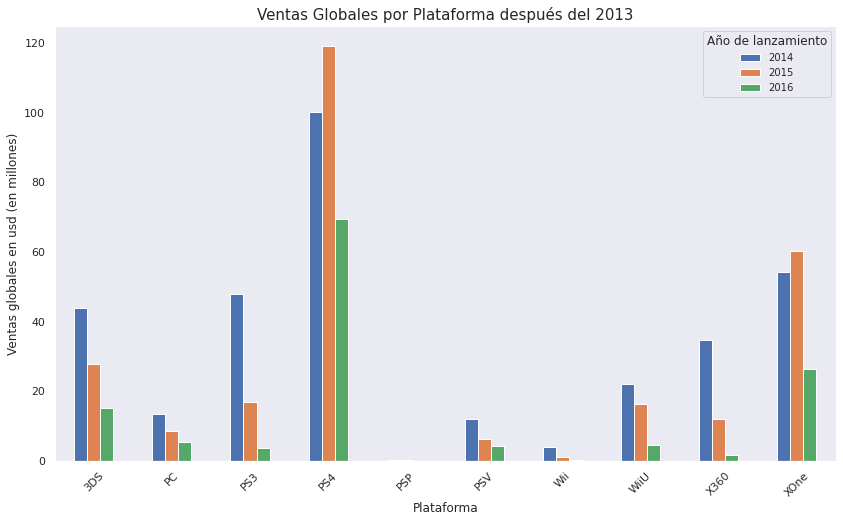

In [70]:
# se grafican las ventas globales para las plataformas
pivot_2014_2016.plot(kind= 'bar',
       rot= 45,
       figsize= [14,8],
       grid= False
       )

plt.title('Ventas Globales por Plataforma después del 2013', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.legend(title= 'Año de lanzamiento', fontsize= 10)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Obervación:**  
Para las plataformas del top 10 con más ventas, para todas las ventas disminuyen en el 2016, sin embargo, para PS4, XOne y 3DS tiene mayores ventas en ese año. A pesar que  PS3 lidera las ventas totales, éstas disminuyen de forma notable a partir del año 2014. Mientras que, para PS4 y XOne aumentan, además, tienen más ventas en el 2016.

</span>
   
<span style="color: darkred;">

Se considerarán las plataformas potencialmente rentables sólo a las 5 con más ventas globales, las cuales son: PC, 3DS, PS4, XOne y PS3. Es importante mencionar que a pesar que X360 está dentro del top 5 con más ventas este no se considera en la lista anterior, debido a que sus ventas disminuyen drásticamente a tráves de los años. En lugar de X360 en el top 5 se decidió dejar a la plataforma PC, a pesar de que es una plataforma en donde el primer videojuego se lanzó en 1985 aún continua vigente a la época reciente.

</span>

</div>

In [71]:
# se crea una lista con las 5 plataformas potencialmente rentables
top_5_potential = ['PC', '3DS', 'PS4', 'XOne', 'PS3']
# se filtra el DataFrame df_2014_2016 para el top 5 de plataformas con más potencial
df_platforms_profitable = df_2014_2016[df_2014_2016['platform'].isin(top_5_potential)]
df_platforms_profitable.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,74.0,Unknown,14.63,recent
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,recent
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,78.0,Unknown,11.68,recent
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58,recent
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,74.0,Unknown,7.98,recent


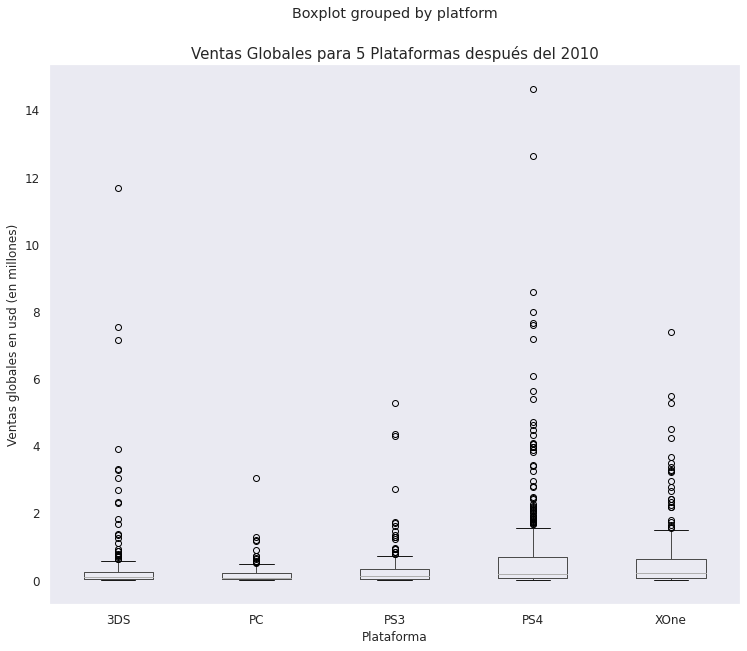

In [72]:
# se grafica un boxplot para las ventas globales para las 5 plataformas potencialmente rentables
df_platforms_profitable.boxplot(column= 'total_sales',
                             by= 'platform',
                             fontsize= 12,
                             grid= False,
                             figsize= [12,10]
                             )

plt.title('Ventas Globales para 5 Plataformas después del 2010', fontsize= 15)
plt.xlabel('Plataforma', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

In [73]:
# se agrupan las plataformas con sus estadísticos descriptivos 
df_platforms_profitable.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Obervación:**  
Se oberva que el promedio de las ventas globales para las 5 pltaformas no rebasa el millón de dólares, para PS4 y XOne las ventas promedio son muy similares. Las 5 plataformas tienen valores mayores que el valor máximo del diagrama de caja (1.5 veces el rango intercuartílico (IQR) del cuartil Q3).

</span>


</div>

### Reseñas de usuarios y profesionales y las ventas  <a id='scores'></a>

<span style="color:darkgreen">
    
Se revisa como las calificaciones de los usuarios y criticos afectan las ventas de dos plataformas populares, en este caso serán las plataformas PS3 y X360, ya que son las que tienen más ventas.
      
    
Se crea un diagram de dispersión y se calcula la correlación.
    
</span>

In [74]:
# se filtra el DataFrame de las platarformas potemcialmente rentables
# con datos de PS3 solamente
df_PS3 = df_platforms_profitable[df_platforms_profitable['platform'] == 'PS3']
df_PS3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,69.0,71.0,Unknown,5.27,recent
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,73.0,48.0,M,4.36,recent
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,75.0,45.0,E,4.28,recent
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,75.0,32.0,E,2.70,recent
1021,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,68.0,51.0,M,1.74,recent


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


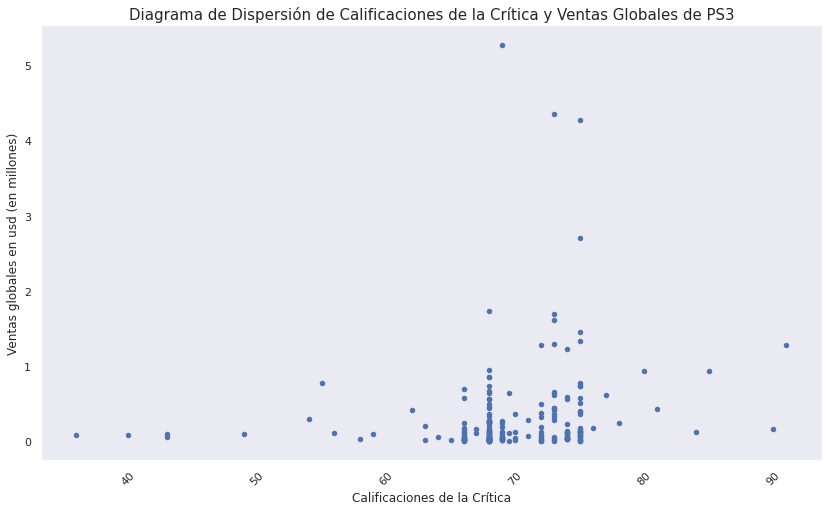

In [75]:
# se grafica el diagrama de dispersión para las calificaciones de la crítica y las ventas globales para PS3
df_PS3.plot(x= 'critic_score',
            y= 'total_sales',
            kind= 'scatter',
            rot= 45,
            figsize= [14,8],
            grid= False
            )

plt.title('Diagrama de Dispersión de Calificaciones de la Crítica y Ventas Globales de PS3', fontsize= 15)
plt.xlabel('Calificaciones de la Crítica', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


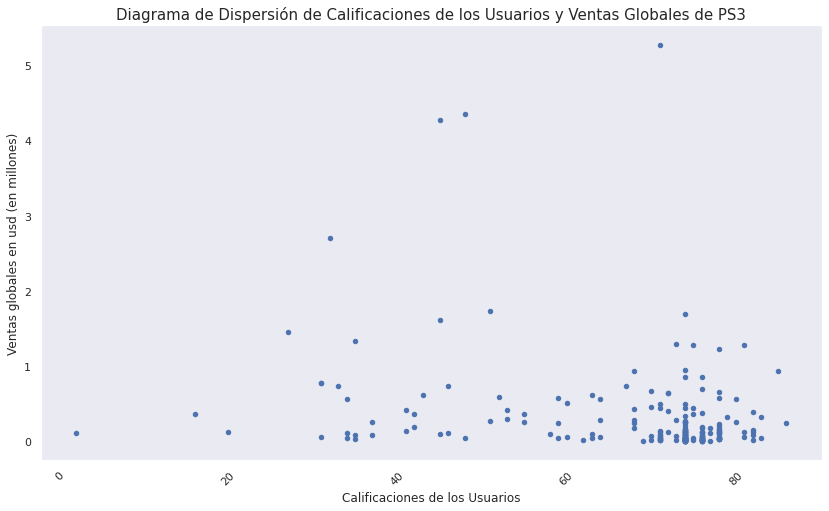

In [76]:
# se grafica el diagrama de dispersión para las calificaciones de los usuarios y las ventas globales para PS3
df_PS3.plot(x= 'user_score',
            y= 'total_sales',
            kind= 'scatter',
            rot= 45,
            figsize= [14,8],
            grid= False
            )

plt.title('Diagrama de Dispersión de Calificaciones de los Usuarios y Ventas Globales de PS3', fontsize= 15)
plt.xlabel('Calificaciones de los Usuarios', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

In [77]:
# se calcula el coeficiente de correlación usando el método corr()
corr_critic_sales_PS3 = df_PS3['critic_score'].corr(df_PS3['total_sales'])
corr_users_sales_PS3 = df_PS3['user_score'].corr(df_PS3['total_sales'])
print(f'La correlación entra las calificaciones de la crítica y las ventas globales es: {corr_critic_sales_PS3}')
print(f'La correlación entra las calificaciones de la crítica y las ventas globales es: {corr_users_sales_PS3}')

La correlación entra las calificaciones de la crítica y las ventas globales es: 0.167431014937373
La correlación entra las calificaciones de la crítica y las ventas globales es: -0.24923025323801393


In [78]:
# se filtra el DataFrame de las platarformas potemcialmente rentables
# con datos de X360 solamente
df_XOne = df_platforms_profitable[df_platforms_profitable['platform'] == 'XOne']
df_XOne.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,74.0,Unknown,7.39,recent
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47,recent
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,5.26,recent
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,64.0,T,4.49,recent
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,62.0,M,4.22,recent


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


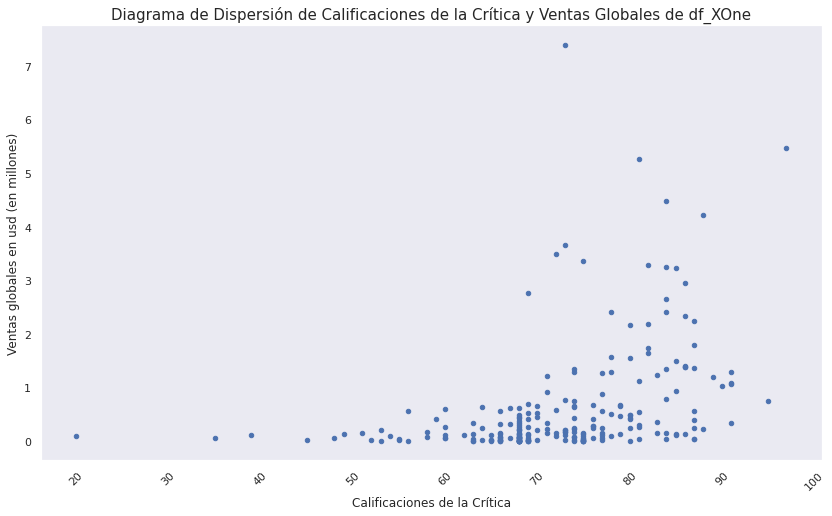

In [79]:
# se grafica el diagrama de dispersión para las calificaciones de los críticos y las ventas globales para X360
df_XOne.plot(x= 'critic_score',
            y= 'total_sales',
            kind= 'scatter',
            rot= 45,
            figsize= [14,8],
            grid= False
            )

plt.title('Diagrama de Dispersión de Calificaciones de la Crítica y Ventas Globales de df_XOne', fontsize= 15)
plt.xlabel('Calificaciones de la Crítica', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


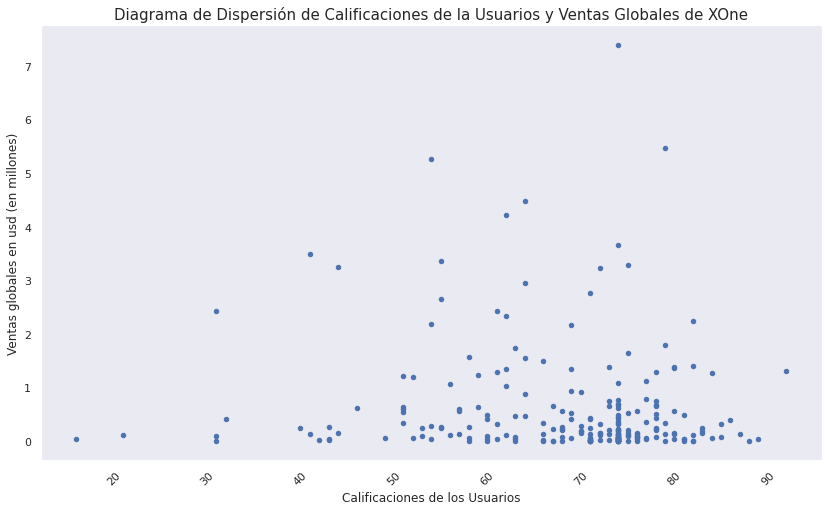

In [80]:
# se grafica el diagrama de dispersión para las calificaciones de los usuarios y las ventas globales para XOne
df_XOne.plot(x= 'user_score',
            y= 'total_sales',
            kind= 'scatter',
            rot= 45,
            figsize= [14,8],
            grid= False
            )

plt.title('Diagrama de Dispersión de Calificaciones de la Usuarios y Ventas Globales de XOne', fontsize= 15)
plt.xlabel('Calificaciones de los Usuarios', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

In [81]:
# se calcula el coeficiente de correlación usando el método corr()
corr_critic_sales_X360 = df_XOne['critic_score'].corr(df_XOne['total_sales'])
corr_users_sales_X360 = df_XOne['user_score'].corr(df_XOne['total_sales'])
print(f'La correlación entra las calificaciones de la crítica y las ventas globales es: {corr_critic_sales_X360}')
print(f'La correlación entra las calificaciones de la crítica y las ventas globales es: {corr_users_sales_X360}')

La correlación entra las calificaciones de la crítica y las ventas globales es: 0.3941108280719495
La correlación entra las calificaciones de la crítica y las ventas globales es: -0.09853048267615326


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Obervación:**  
De acuersdo al diagrama de dispersión tanto para la plataforma PS3 y XOne la correlación entre las calificaciones de la crítica y las ventas globales es ligeramente positivo, ya que en ambos casos es de alrededor de 0.3. Mientras que para la correlación entre las calificaciones de los usurios y las ventas globales, no existe ya que sus valores son cercanos a cero.

</span>

</div>

<span style="color: darkgreen;">

A partir del `DataFrame` de las plataformas potencialmente rentables que se elegieron, se buscan los 5 videojuegos con más ventas globales. Después se comparan las ventas en cada plataforma.
    
</span>

In [82]:
# se filtra el DataFrame df_platforms_profitable por nombre del videojuego y la suma de las ventas globales para cada uno
top_5_games = df_platforms_profitable.groupby('name')['total_sales'].sum().sort_values(ascending= False)
top_5_games.head()

name
Call of Duty: Black Ops 3         23.97
Grand Theft Auto V                19.26
Call of Duty: Advanced Warfare    17.69
FIFA 16                           14.73
FIFA 15                           13.29
Name: total_sales, dtype: float64

<span style="color: darkgreen;">
    
  
Los 5 videojuegos con más ventas globales son: **Call of Duty: Black Ops 3, Grand Theft Auto V, Call of Duty: Advanced Warfare, FIFA 16 y FIFA 15**. Los videojuegos de la franquicia Call of Duty ocupa 2 lugares del top 5 de los videojuegos con más ventas, siendo Call of Duty: Black Ops 3 el primer puesto.
    
Ahora el DataFrame `df_platforms_profitable` se filtra para obtener los datos que solo tengan el top 5 de los viejuegos más vendidos.

</span>

In [83]:
# se crea una lista con los videojuegos más vendidos
top_5_games_list = ['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'Call of Duty: Advanced Warfare', 'FIFA 16', 'FIFA 15']
# se filtra el DataFrame
top5_platforms_games = df_platforms_profitable[df_platforms_profitable['name'].isin(top_5_games_list)]
top5_platforms_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,74.0,Unknown,14.63,recent
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,recent
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58,recent
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66,recent
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,74.0,Unknown,7.39,recent
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,57.0,E,6.08,recent
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47,recent
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,5.26,recent
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,73.0,48.0,M,4.36,recent
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,75.0,45.0,E,4.28,recent


In [84]:
# se crea un DataFrame con pivot_table() para las ventas totales para cada plataforma en cada año
# se asigna el resultado a pivot_platforms_games
pivot_platforms_games = top5_platforms_games.pivot_table(index='name',
                                    columns='platform',
                                    values='total_sales',
                                    aggfunc='sum'
                                    )

pivot_platforms_games

platform,3DS,PC,PS3,PS4,XOne
name,,,,,
Call of Duty: Advanced Warfare,NaN,0.41,4.36,7.66,5.26
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,7.39
FIFA 15,0.46,0.29,4.28,6.08,2.18
FIFA 16,NaN,0.20,2.70,8.58,3.25
Grand Theft Auto V,NaN,1.17,NaN,12.62,5.47


<span style="color: darkgreen;">

A partir de la tabla dinámica se construye un gráfico de barras para observar las ventas de cada videojuego del top 5 para cada plataforma. Es importante mencionar que el único videojuego que tuvo ventas para la consola 3DS, fue FIFA 15; probablemente los demás videojuegos no se lanzaron para esa plataforma.
    
</span>

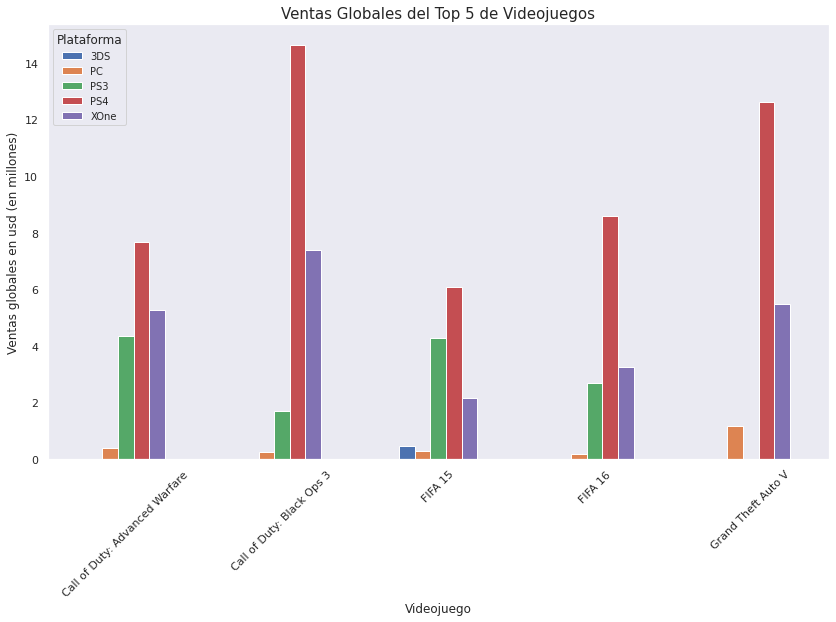

In [85]:
# se grafican las ventas globales para el top 5 de los videojuegos más vendidos en cada plataforma con potencial rentabilidad
pivot_platforms_games.plot(kind= 'bar',
       rot= 45,
       figsize= [14,8],
       grid= False
       )

plt.title('Ventas Globales del Top 5 de Videojuegos', fontsize= 15)
plt.xlabel('Videojuego', fontsize= 12)
plt.ylabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.legend(title= 'Plataforma', fontsize= 10)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Obervaciones:**  
Call of Duty: Black Ops 3 tuvo más ventas en las plataformas de PS4, XOne y PS3. PS4 y XOne son las que tienen las mayores ventas globales en todos los videojuegos. La consola PS3 no tuvo ventas para Grand Theft Auto V. Lo anterior se puede deber a que dicho videojuego no se lanzó para esa plataforma, o bien, los usuarios prefirieron jugarlo en el PS4. Respecto al 3DS lo más probable es que los videojuegos no se lanzaron para esa plataforma, por ello sólo tiene ventas para FIFA 15.   

</span>

</div>

<span style="color: darkgreen;">  
Ahora a partir del DataFrame de las plataformas potencialmente rentables (`df_platforms_profitable`) se agrupan los géneros con más ventas y menos ventas, el top 5 para cada uno.
</span>

In [86]:
# se agrupan la suma de las ventas globales por género
# se emplea sort_values(ascending= False) para ordenar los valores de mayor a menor
df_genre_sum = df_platforms_profitable.groupby('genre')['total_sales'].sum().sort_values(ascending= False)
df_genre_sum

genre
Action          168.18
Shooter         151.81
Sports           93.41
Role-Playing     91.06
Misc             25.10
Fighting         20.99
Racing           18.69
Adventure        12.96
Simulation       12.67
Platform         10.84
Strategy          3.78
Puzzle            0.93
Name: total_sales, dtype: float64

In [87]:
# se agrupan el promedio de las ventas globales por género
# se emplea sort_values(ascending= False) para ordenar los valores de mayor a menor
df_genre_mean = df_platforms_profitable.groupby('genre')['total_sales'].mean().sort_values(ascending= False)
df_genre_mean

genre
Shooter         1.392752
Sports          0.747280
Role-Playing    0.599079
Fighting        0.456304
Platform        0.433600
Action          0.394789
Misc            0.343836
Racing          0.327895
Simulation      0.324872
Adventure       0.140870
Strategy        0.114545
Puzzle          0.103333
Name: total_sales, dtype: float64

In [88]:
# se agrupan el promedio de las ventas globales por género
# se emplea sort_values(ascending= False) para ordenar los valores de mayor a menor
df_genre_count = df_platforms_profitable.groupby('genre')['name'].count().sort_values(ascending= False)
df_genre_count

genre
Action          426
Role-Playing    152
Sports          125
Shooter         109
Adventure        92
Misc             73
Racing           57
Fighting         46
Simulation       39
Strategy         33
Platform         25
Puzzle            9
Name: name, dtype: int64

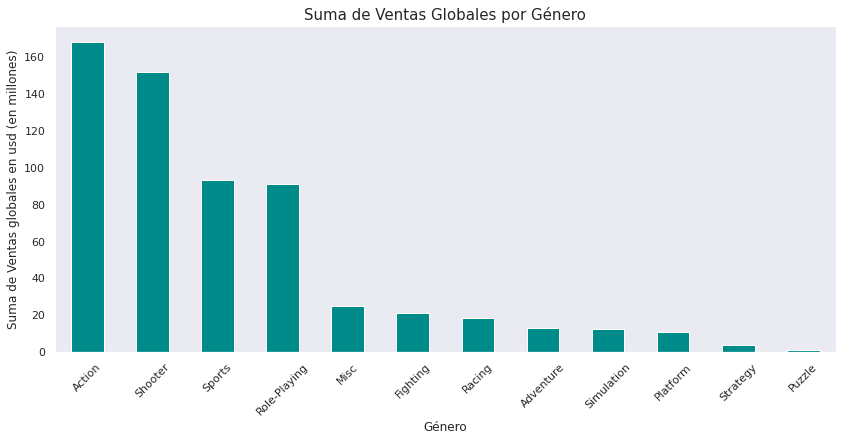

In [89]:
# se realiza un gráfico de barras para el Series df_genre_sum
df_genre_sum.plot(kind= 'bar',
              rot= 45,
              figsize= [14,6],
              color= 'darkcyan',
              grid= False
              )

plt.title('Suma de Ventas Globales por Género', fontsize= 15)
plt.xlabel('Género', fontsize= 12)
plt.ylabel('Suma de Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

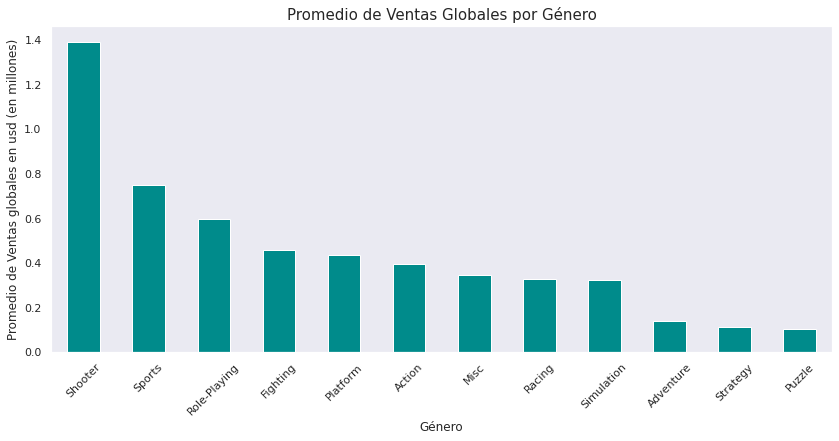

In [90]:
# se realiza un gráfico de barras para el Series df_genre_mean
df_genre_mean.plot(kind= 'bar',
              rot= 45,
              figsize= [14,6],
              color= 'darkcyan',
              grid= False
              )

plt.title('Promedio de Ventas Globales por Género', fontsize= 15)
plt.xlabel('Género', fontsize= 12)
plt.ylabel('Promedio de Ventas globales en usd (en millones)', fontsize= 12)
plt.show()

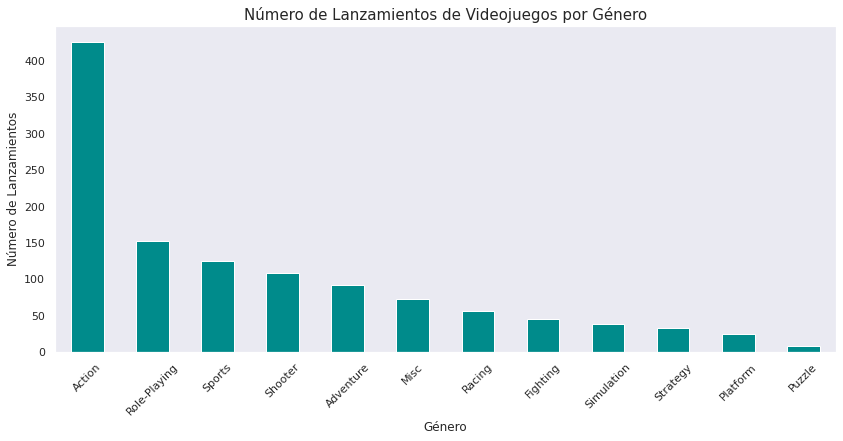

In [91]:
# se realiza un gráfico de barras para el Series df_genre_count
df_genre_count.plot(kind= 'bar',
              rot= 45,
              figsize= [14,6],
              color= 'darkcyan',
              grid= False
              )

plt.title('Número de Lanzamientos de Videojuegos por Género', fontsize= 15)
plt.xlabel('Género', fontsize= 12)
plt.ylabel('Número de Lanzamientos', fontsize= 12)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Obervaciones:**  
    
A partir del gráfico Número de Lanzamientos de Videojuegos por Género, el género acción tiene más lanzamientos de videojuegos y una suma total de más ventas globles, sin embargo, el primer puesto del promedio de las ventas globales es para el género de disparos (Shooter) y el género de acción baja a la sexta posición. Lo anterior refleja que algunos géneros tienen gran cantidad de venta debido a que tuvieron muchos títulos con poca venta y otros géneros tienen pocos títulos pero con una mejor venta. Tal es el caso del género de pelea (Fighting) que tuvo menos de 50 lanzamiento, pero en promedio tuvo más ventas que el género de acción.  
    
</span>

</div>

### Ventas por regiones <a id='regiones'></a>

<span style="color: darkgreen;">
    
A partir del DataFrame `df_2010_2016` que tiene los datos a partir del 2010, se hará los siguiente:  
* Se agruparán las ventas por plataforma con la suma de sus ventales globales por región (columnas `na_sales`, `eu_sales` y `jp_sales`).
* El Series resultante se ordena de mayor a menor de cuardo a sus valores y se mustran sólo las 5 primeras filas y guarda en una nueva variable.
* Se grafican los Series.
* Los pasos anteriores se repiten para los géneros y la clasificación de los videojuegos.
</span>

#### Ventas por plataformas <a id='plataformas_region'></a>

In [92]:
# se agrupan las ventas globales por platoforma para cada región
# los valores se ordenan de mayor a menor con sort_values(inplace= False) 
# las 5 primeras filas series resultante para cada región se guardan en una nueva variable
top5_platforms_na = df_2014_2016.groupby('platform')['na_sales'].sum().sort_values(ascending= False).head()
top5_platforms_eu = df_2014_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending= False).head()
top5_platforms_jp = df_2014_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending= False).head()

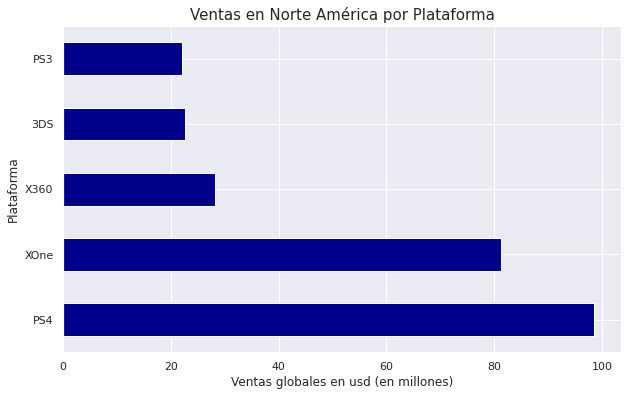

In [93]:
top5_platforms_na.plot(kind= 'barh',
                       figsize= [10,6],
                       color= 'darkblue'
                      )

plt.title('Ventas en Norte América por Plataforma', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Plataforma', fontsize= 12)
                       
plt.show()

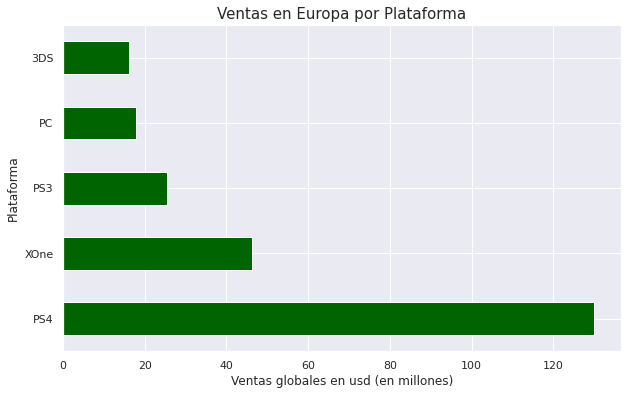

In [94]:
top5_platforms_eu.plot(kind= 'barh',
                       figsize= [10,6],
                       color= 'darkgreen'
                      )

plt.title('Ventas en Europa por Plataforma', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Plataforma', fontsize= 12)
                       
plt.show()

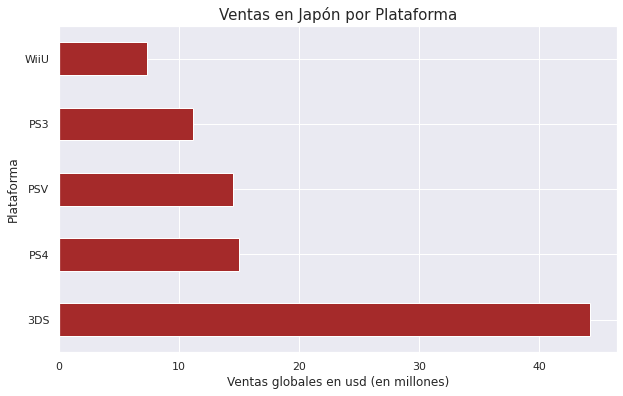

In [95]:
top5_platforms_jp.plot(kind= 'barh',
                       figsize= [10,6],
                       color= 'brown'
                      )

plt.title('Ventas en Japón por Plataforma', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Plataforma', fontsize= 12)
                       
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Conclusiones respecto a las plataformas con más ventas por región:**  
En Norte América las plataformas con más ventas son PS3, 3DS, X360, XOne y PS4, de la misma manera ocurre en Europa son las mismas consolas con mayores ventas, a difrencia de PC que ocupa el cuarto lugar, en Améric del Norte no se encuentra en el TOp 5. La plataforma con más ventas para Norte América y Europa es PS4. En cuanto a Japón, las plataformas con más ventas son diferentes respecto a las otras dos regiones, únicamente coincide PS3 y PS4. Principalmente las consolas portátiles son las que tienen mayores ventas en Japón, siendo el 3DS la que tiene más ventas. Se debe agregar que el top 5 de las plataformas en Japón son desarrolladas por empresas Japonesas.

</span>

</div>

#### Ventas por Géneros <a id='generos_region'></a>

In [96]:
# se agrupan las ventas globales por género para cada región
# los valores se ordenan de mayor a menor con sort_values(inplace= False) 
# las 5 primeras filas series resultante para cada región se guardan en una nueva variable
top5_genre_na = df_2014_2016.groupby('genre')['na_sales'].sum().sort_values(ascending= False).head()
top5_genre_eu = df_2014_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending= False).head()
top5_genre_jp = df_2014_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending= False).head()

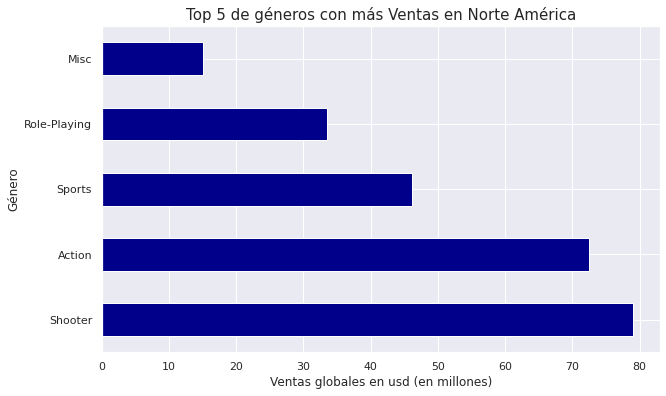

In [97]:
# se grafican los géneros con más ventas en América del Norte
top5_genre_na.plot(kind= 'barh',
                   figsize= [10,6],
                   color= 'darkblue'
                   )

plt.title('Top 5 de géneros con más Ventas en Norte América', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Género', fontsize= 12)
                       
plt.show()

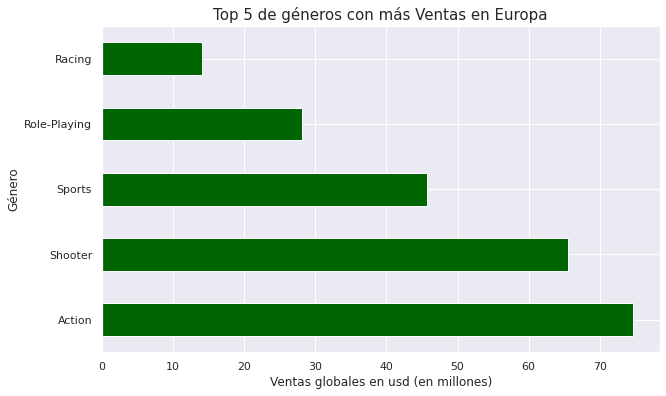

In [98]:
# se grafican los géneros con más ventas en Europa
top5_genre_eu.plot(kind= 'barh',
                   figsize= [10,6],
                   color= 'darkgreen'
                   )

plt.title('Top 5 de géneros con más Ventas en Europa', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Género', fontsize= 12)
                       
plt.show()

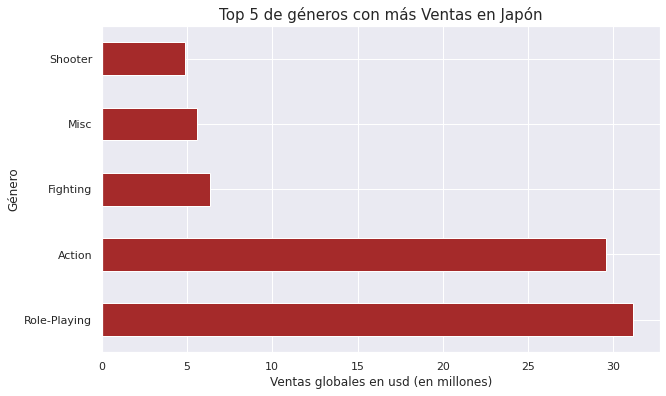

In [99]:
# se grafican los géneros con más ventas en Japón
top5_genre_jp.plot(kind= 'barh',
                   figsize= [10,6],
                   color= 'brown'
                   )

plt.title('Top 5 de géneros con más Ventas en Japón', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Género', fontsize= 12)
                       
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Conclusiones respecto a los géneros con más ventas por región:**  
El top 5 de los géneros más vendidos es similar para las regiones de Norte América y Europa, los tres primeros lugares son los mismos, para el 5 y 4 lugar en Norte América son los géneros misceláneos y juegos de rol, respectivamente. Mientras que en Europa el 5 y 4 lugar son los géneros de carreras y juegos de rol, respectivamente. Para Japón los juegos de rol son los que tienen más ventas, seguido por el género de acción, a diferencia de otras dos regiones los géneros en Japón si son diferentes a excepción del género de peleas y miscelaneos.

</span>

</div>

#### Ventas por Clasificación <a id='rating_region'></a>

In [100]:
# se agrupan las ventas globales por clasificsción del videojuego (rating) para cada región
# los valores se ordenan de mayor a menor con sort_values(inplace= False) 
# las 5 primeras filas series resultante para cada región se guardan en una nueva variable
top5_rating_na = df_2014_2016.groupby('rating')['na_sales'].sum().sort_values(ascending= False).head()
top5_rating_eu = df_2014_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending= False).head()
top5_rating_jp = df_2014_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending= False).head()

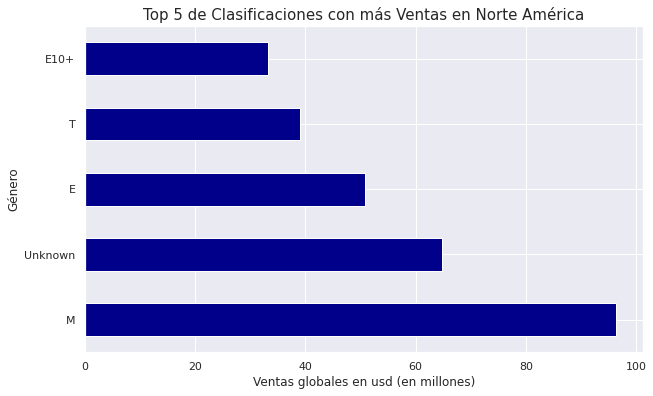

In [101]:
# se grafican las clasificaciones con más ventas en América del Norte
top5_rating_na.plot(kind= 'barh',
                   figsize= [10,6],
                   color= 'darkblue'
                   )

plt.title('Top 5 de Clasificaciones con más Ventas en Norte América', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Género', fontsize= 12)
                       
plt.show()

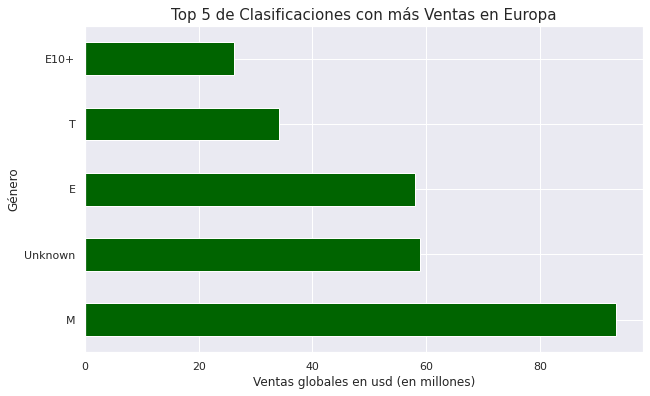

In [102]:
# se grafican las clasificaciones con más ventas en Europa
top5_rating_eu.plot(kind= 'barh',
                   figsize= [10,6],
                   color= 'darkgreen'
                   )

plt.title('Top 5 de Clasificaciones con más Ventas en Europa', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Género', fontsize= 12)
                       
plt.show()

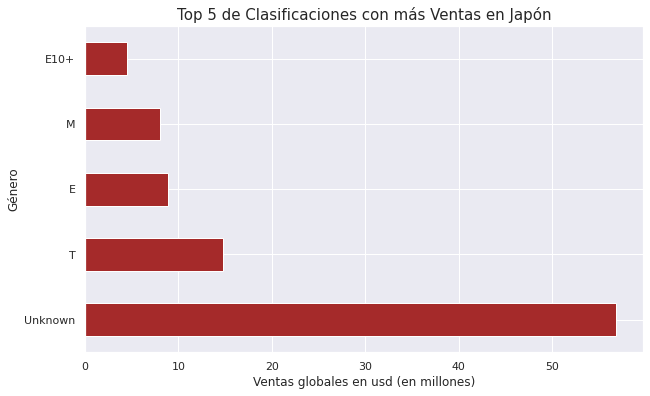

In [103]:
# se grafican las clasificaciones con más ventas en Japón
top5_rating_jp.plot(kind= 'barh',
                   figsize= [10,6],
                   color= 'brown'
                   )

plt.title('Top 5 de Clasificaciones con más Ventas en Japón', fontsize= 15)
plt.xlabel('Ventas globales en usd (en millones)', fontsize= 12)
plt.ylabel('Género', fontsize= 12)
                       
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Conclusiones respecto a los géneros con más ventas por región:**  
La clasificación M (para adultos), es la que tiene más ventas para las regiones de Norte América y Europa, en segundo lugar la clasificación desconocido, seguida por la clasificación E (de 6 años en adelante). En Norte América el top 5 esta conformado por las clasificaciones M, Desconocido, E, T y E10+, para Europa son las mismas clasificaciones, de mayores a menores ventas. En Japón la clasificación con más ventas se desconoce y es seguida por las clasificaciones T, E, M y E10+, a diferentes de Norte América y Europa la clasificación M ocupa el puesto 4 del top 5.

</span>

</div>

## Pruebas de Hipótesis <a id='hipotesis'></a>

<span style="color: darkgreen;">

**Primera prueba de hipótesis**  
Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.  
Ha: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.  
Para probar la hipótesis se empleará la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.  
Se empleará el DataFrame `df_games` que tiene todos los datos desde 1985 hasta el 2016, se filtra el DataFrame para cada una de las plataformas y después para cada DataFrame resultante con las datos de XOne y PC se pasarán como argumento la columna `user_score` en los parámetros `array1` y `array2`, respectivamente.  
    
Para determinar el valor del parámetro `equal_var` se hace un test de levene para saber si las varianzas son iguales o diferentes. 
El valor de alfa será de 5 % (0.05).    
</span>

In [104]:
# se filtra el DataFrame df_games donde sólo se tenga la plataforma XOne y se guarda en df_XOne
df_xone = df_games[df_games['platform'] == 'XOne']
# se filtra el DataFrame df_games donde sólo se tenga la plataforma XOne y se guarda en df_PC
df_pc = df_games[df_games['platform'] == 'PC']

<span style="color: darkgreen;">

La hipótesis nula (H0) en el test de Levene es que todas las poblaciones tienen varianzas iguales.  
La hipótesis alternativa (Ha) es que al menos una de las poblaciones tiene una varianza diferente.
    
</span>

In [105]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre loa dos grupos
alpha= 0.05
platform_levene_results = st.levene(df_xone['user_score'], df_pc['user_score'])

print('El valor p en el test de levene es:', platform_levene_results.pvalue)

if platform_levene_results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p en el test de levene es: 0.5564877168495681
No se rechaza la hipótesis nula


<span style="color: darkgreen;">

De acuerdo al resultado del test de levene no se rechaza la hipótesis nula, por lo que las varianzas son iguales. Entonces el parámetro `equal_var` se deja de forma predeterminada en `True`.
    
</span>

In [106]:
# Se prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_score'
results_score = st.ttest_ind(df_xone['user_score'], df_pc['user_score'])

print('El valor p es:', results_score.pvalue)

if results_score.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 3.154185891445368e-05
Se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">

**Conclusiones:**  
De acuerdo al resultado, podemos rechazar la hipótesis nula de que las calificaciones de los usuarios para las plataformas Xbox One y PC son iguales. El resultado indica que las calificaciones de los usuarios difiere para cada plataforma XOne o PC con una confianza estadística del 95%.

</span>

</div>

<span style="color: darkgreen;">

**Segunda prueba de hipótesis**  
Ho: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.  
Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.  
Para probar la hipótesis también se empleará la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.  
Se empleará el DataFrame `df_games` que tiene todos los datos desde 1985 hasta el 2016, se filtra el DataFrame para cada uno de los géneros y después para cada DataFrame resultante con las datos de Acción y DEportes se pasarán como argumento la columna `user_score` en los parámetros `array1` y `array2`, respectivamente.  
    
Para determinar el valor del parámetro `equal_var` se hace un test de levene para saber si las varianzas son iguales o diferentes.
El valor de alfa será de 5 % (0.05). 
    
</span>

In [107]:
# se filtra el DataFrame df_games donde sólo se tenga del género acción (Action)  y se guarda en df_action
df_action = df_games[df_games['genre'] == 'Action']
# se filtra el DataFrame df_games donde sólo se tenga del género deportes (Sports) y se guarda en df_sports
df_sports = df_games[df_games['genre'] == 'Sports']

<span style="color: darkgreen;">

La hipótesis nula (H0) en el test de Levene es que todas las poblaciones tienen varianzas iguales.  
La hipótesis alternativa (Ha) es que al menos una de las poblaciones tiene una varianza diferente.
    
</span>

In [108]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre loa dos grupos
alpha= 0.05
genre_levene_results = st.levene(df_action['user_score'], df_sports['user_score'])

print('El valor p en el test de levene es:', genre_levene_results.pvalue)

if genre_levene_results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p en el test de levene es: 0.8305033347865283
No se rechaza la hipótesis nula


<span style="color: darkgreen;">

De acuerdo al resultado del test de levene no se rechaza la hipótesis nula, por lo que las varianzas son iguales. Entonces el parámetro `equal_var` se deja de forma predeterminada en `True`.
    
</span>

In [109]:
# Se prueba las hipótesis
# valor de alfa
alpha= 0.05
# se asigna el resultado en 'results_genre'
results_genre = st.ttest_ind(df_action['user_score'], df_sports['user_score'])

print('El valor p es:', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

El valor p es: 0.40591730012514315
No se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">
    
<span style="color: darkblue;">

**Conclusiones:**  
De acuerdo al resultado, no podemos rechazar la hipótesis nula de que las calificaciones de los usuarios para los géneros de Acción y Deportes sean iguales. El valor de p nos dice que existe un 40.59 % de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor, esta probabilidad es demasiado alta para concluir que existe una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

</span>

</div>  

## Resumen y Conclusión General <a id='end'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">
    
**Resumen General de los pasos seguidos:**  
1. Se reemplazaron los nombres de las columnas para que estuvieran en minúscula. Después se conviertieron los datos en los tipos necesarios.  
2. Se trataron los valores ausentes en las columnas `name`, `year_of_release`, `genre`, `critic_score` y `critic_score`.  
3. Se creo una columna nueva `total_sales` para calcular las ventas globales de videojuegos.  
4. Luego se calcularon cuántos juegos fueron lanzados en los diferentes años.  
5. Se calcularon las ventas globales de una plataforma a otra.  
6. Se buscaron las plataformas que solían ser populares pero que ahora no tienen ventas.  
7. Se estimó cuánto tardan por lo general las nuevas plataformas en aparecer y las antiguas en desaparecer.  
8. Se determinó el período de datos a utilizar que fue de 2010 a 2016, se descartaron los datos de años anteriores y se enfoca en los datos pertinentes para el análisis.  
9. Se identificaron las plataformas líderes en ventas y se observa su crecimiento o disminución. Se eligieron las plataformas potencialmente rentables.  
10. Se construyó un diagrama de caja para visualizar las diferencias en las ventas globales de juegos en diferentes plataformas.  
11. Se analizó el impacto de las reseñas de usuarios y profesionales en las ventas de una plataforma popular, con un diagrama de dispersión y su correlación.  
12. Se compararon las ventas del top 5 de los videojuegos en diferentes plataformas, teniendo en cuenta las conclusiones del paso anterior.  
13. Se identificaron los 5 géneros más rentables.
    
</span>

</div>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">
    
**Conclusión General:**  
• Los años con mayor cantidad de videojuegos lanzados fueron el 2008 y 2009 con 1426 y 1427, respectivamente.  
• Las plataformas con más ventas de 1985 a 2016 fueron fueron DS, Wii, PS3, X360 y PS2 con más de 800 millones de dólares.  
• PC es la plataforma más longeva con 31 años, mientras que, el promedio de tiempo de vida de las plataformas oscila entre 6 y 8 años. Además, se mantiene con ventas y lanzamientos de videjuegos en la última década, ha acumulado un total de 255.76 millones de dólares desde su primer lanzamiento.  
• En el 2016 las plataformas con más ventas fueron PS4 y XOne con 69.25 y 26.15 millones de dólares, respectivamente, esto se puede deber a que son plataformas de última generación y a sólo tienen 3 años en el mercado, por tanto son las dos plataformas potencialmente rentables.  
• Los tres géneros que tienen más ventas en Norte América y Europa son los de deportes, acción y disparos con más de 300 millones de dólares en ventas acumulados para ambas regiones. Para Japón son los de peleas, acción y juegos de rol con ventas de alrededor de 67 millones de dólares.  
• La clasificación que genera más ganancias es la M para Norte América y Europa generando aproximadamente 190 millones de dólares entre las dos regiones. Mientras que, en Japón los videojuegos que se encuentran sin clasificar son los que generan más ventas, casi 57 millones de dólares.   
• En Japón la plataforma 3DS es la que tiene más ventas con 44.24 millones de dólares, seguida de PS4 con 15.02 millones de dólares, el top 5 de platarformas en Japón son desarrolladas por empresas japonesas. En Norte América y Europa PS4 y XOne son las dos plataformas que generan más ventas con un acumulado de 356.17 millones de dólares.  
• Las calificaciones de los críticos tienen una ligera positiva en las ventas de los videojuegos, se puede deber a que estos tienen oportunidad de jugarlos antes del lanzamiento y su calificación puede influir en los usuarios para adquirir o no el videojuego.  

    
</span>

</div>